# Geospatial Visualization in Python

## Making a map with points in Python with Plotly Express

We're going to be doing a lot of the stuff from the [Plotly Graphing Libraries Tutorials](https://plotly.com/python). This walkthrough is a variation of [Amelia McNamara](https://github.com/AmeliaMN)'s version.

We will start with a simple Scattergeo plot showing Smith on the contiguous USA. 

In [80]:
import plotly.graph_objects as go
import pandas as pd

df = pd.DataFrame([[42.3163, -72.6403, "Smith!"]], columns=['lat', 'long', 'text'])

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 10,
            color = 'blue'
        )
        ))

fig.update_layout(geo = dict(
        scope = 'usa',
        landcolor = "rgb(212, 212, 212)",
        resolution = 50,
        lonaxis = dict(
            showgrid = False,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = False,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    )
    )
fig.show()

Please consult the [Plotly Documentation](https://plotly.com/python/scatter-plots-on-maps/) for more details.

## Okay, let's do something with actual data

Lets look at [storm data](http://www.ncdc.noaa.gov/stormevents/ftp.jsp) from the NOAA. It comes in a few files that we need to join together in order to use. For convenience, I've put them on the course website. You can download them manually, as .zip files:

In [89]:
stormDetails = pd.read_csv('too-big-for-git/StormEvents_details-ftp_v1.0_d2023_c20240917.csv')
stormLocations = pd.read_csv('too-big-for-git/StormEvents_locations-ftp_v1.0_d2023_c20240917.csv')

storms = stormDetails.merge(stormLocations, how = 'left', on = 'EVENT_ID')

storms.head()



,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,...,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,202310,25,230,202310,27,551,186682,1145781,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202310,25,230,202310,27,1437,186682,1145783,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202310,25,230,202310,27,1126,186682,1145784,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202310,25,230,202310,27,1301,186682,1145796,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202310,25,230,202310,27,600,186682,1145884,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mapping lightning strikes
Let's pull out the lightning strikes and map them. 

In [91]:
lightning = storms[storms['EVENT_TYPE'] == "Lightning"]

fig = go.Figure(data=go.Scattergeo(
        lon = lightning['LONGITUDE'],
        lat = lightning['LATITUDE'],
        text = "Zap!",
        mode = 'markers',
        marker = dict(
            size = 10,
            color = 'blue'
        )
        ))

fig.update_layout(geo = dict(
        scope = 'usa',
        landcolor = "rgb(212, 212, 212)",
        resolution = 50,
        lonaxis = dict(
            showgrid = False,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = False,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    )
    )
fig.show()

## Challenge: 
- Find another storm type to map
- Bonus-- add popups!

## Polygons

First let's grab some data (and do a little conversion). Then, let's map size of each point to damage amount. 

In [122]:
import math
import numpy as np 

tornados = storms[storms['EVENT_TYPE'] == "Tornado"]
tornados['DAMAGE_PROPERTY'] = tornados['DAMAGE_PROPERTY'].str.replace('K', "").str.replace('M', "000").astype(float)
tornados.replace([np.inf, -np.inf], np.nan, inplace=True)
tornados = tornados[tornados['DAMAGE_PROPERTY'].notna()]

fig = go.Figure(data=go.Scattergeo(
        lon = tornados['LONGITUDE'],
        lat = tornados['LATITUDE'],
        text = tornados['EVENT_NARRATIVE'],
        mode = 'markers',
        marker = dict(
            size = tornados['DAMAGE_PROPERTY'],
            color = 'lightseagreen',
            line_width=0.5,
            sizemode = 'area'
        )
        ))

fig.update_layout(geo = dict(
        scope = 'usa',
        landcolor = "rgb(212, 212, 212)",
        resolution = 50,
        lonaxis = dict(
            showgrid = False,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = False,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    )
    )
fig.show()

/var/folders/07/3zgr5b1x72d266sb132_gv400wgxz0/T/ipykernel_29746/3310011609.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/07/3zgr5b1x72d266sb132_gv400wgxz0/T/ipykernel_29746/3310011609.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/07/3zgr5b1x72d266sb132_gv400wgxz0/T/ipykernel_29746/3310011609.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Challenge: Can you get the hover labels to wrap? 

## Polgyons come in shapefiles
Most boundaries (state, national, etc) are provided in terms of polygons. Major mapping software ArcGIS, from ESRI, has essentially set the standard formats. There are many files with different extensions: .prj (the projection), .shp (the shapefile), .cpg (??), .dbf (??), .shx (??). 

You need special software or packages to work with shapefiles. 

## State shapefiles

This portion of the tutorial is based on: [Introduction to Geopandas](https://automating-gis-processes.github.io/CSC/notebooks/L2/geopandas-basics.html)

I got the shapefiles used below from [the Census](https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html). You can choose the resolution. If you want, the zipfile of the shapes I used is on the course website (cb_2018_us_state_500k.zip).  

We're going to use the `geopandas` package to deal with shapefiles. The geopandas package offers the `read_file()` function that allows us to read shapefile using the following syntax. This function returns a `geodataframe`. 

In [125]:
import geopandas as gpd 

data = gpd.read_file('too-big-for-git/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
print(type(data))
print(data.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00256 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.6432 38.16909, -82.643 38.16956,...  


Notice how each region has a POLYGON associated with it. 

## Mapping shapefiles

We can map shapefiles using `.plot()`.  


<Axes: >

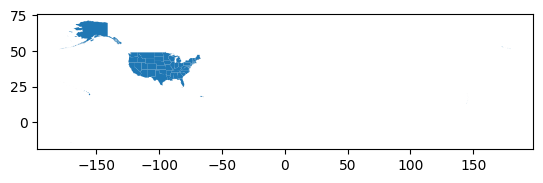

In [126]:
data.plot()

What if we want just a specific region?

<Axes: >

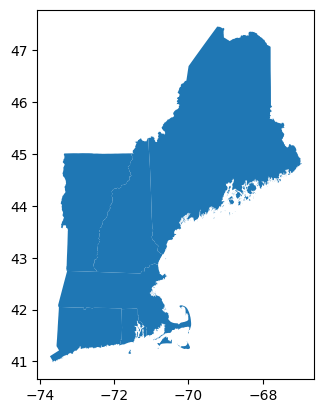

In [129]:
newEngland = data[data['STUSPS'].isin(["ME", "NH", "VT", "RI", "MA", "CT"])]
newEngland.plot()

## Your Turn!

Put it all together! See if you can make a map of your own data, and embed it within a dashboard. **Bonus:** can you make them interact with one another?

## Resources
Follow the links above to more resources for geospatial visualization with R